In [42]:
import torch
import torchvision
import torchvision.transforms as transforms

In [43]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


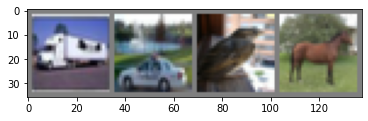

truck   car  bird horse


In [44]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [45]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module): 
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 2 * 2, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)
        self.dropout1 = nn.Dropout(p=0.2, inplace=False)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dropout1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout1(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = self.dropout1(x)
        x = x.view(-1, 128 * 2 * 2)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


net = Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
)

## **SGD Optimizer**

In [46]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [47]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 6000 == 5999:    # print every 6000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 6000))
            running_loss = 0.0

print('Finished Training')

[1,  6000] loss: 2.241
[1, 12000] loss: 1.854
[2,  6000] loss: 1.546
[2, 12000] loss: 1.394
[3,  6000] loss: 1.291
[3, 12000] loss: 1.216
[4,  6000] loss: 1.146
[4, 12000] loss: 1.098
[5,  6000] loss: 1.037
[5, 12000] loss: 1.016
[6,  6000] loss: 0.954
[6, 12000] loss: 0.946
[7,  6000] loss: 0.903
[7, 12000] loss: 0.893
[8,  6000] loss: 0.860
[8, 12000] loss: 0.852
[9,  6000] loss: 0.820
[9, 12000] loss: 0.821
[10,  6000] loss: 0.777
[10, 12000] loss: 0.788
Finished Training


In [48]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 70 %


## **Adam Optimizer**

In [49]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss() #loss function
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [50]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 6000 == 5999:    # print every 6000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 6000))
            running_loss = 0.0

print('Finished Training')

[1,  6000] loss: 0.997
[1, 12000] loss: 0.996
[2,  6000] loss: 0.958
[2, 12000] loss: 0.955
[3,  6000] loss: 0.907
[3, 12000] loss: 0.929
[4,  6000] loss: 0.886
[4, 12000] loss: 0.891
[5,  6000] loss: 0.868
[5, 12000] loss: 0.871
[6,  6000] loss: 0.831
[6, 12000] loss: 0.857
[7,  6000] loss: 0.823
[7, 12000] loss: 0.838
[8,  6000] loss: 0.801
[8, 12000] loss: 0.841
[9,  6000] loss: 0.808
[9, 12000] loss: 0.813
[10,  6000] loss: 0.791
[10, 12000] loss: 0.808
Finished Training


In [51]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 70 %


## **RMSprop Optimizer**

In [39]:
criterion = nn.CrossEntropyLoss() #loss function
optimizer = torch.optim.RMSprop(net.parameters(),lr=0.001)

In [40]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 6000 == 5999:    # print every 6000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 6000))
            running_loss = 0.0

print('Finished Training')

[1,  6000] loss: 1.772
[1, 12000] loss: 1.438
[2,  6000] loss: 1.306
[2, 12000] loss: 1.276
[3,  6000] loss: 1.197
[3, 12000] loss: 1.202
[4,  6000] loss: 1.178
[4, 12000] loss: 1.194
[5,  6000] loss: 1.203
[5, 12000] loss: 1.209
[6,  6000] loss: 1.204
[6, 12000] loss: 1.196
[7,  6000] loss: 1.192
[7, 12000] loss: 1.193
[8,  6000] loss: 1.194
[8, 12000] loss: 1.182
[9,  6000] loss: 1.176
[9, 12000] loss: 1.184
[10,  6000] loss: 1.199
[10, 12000] loss: 1.179
Finished Training


In [41]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


## **Adadelta Optimizer**

In [53]:
criterion = nn.CrossEntropyLoss() #loss function
optimizer =torch.optim.Adadelta(net.parameters(),lr=0.001)

In [54]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 6000 == 5999:    # print every 6000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 6000))
            running_loss = 0.0

print('Finished Training')

[1,  6000] loss: 0.749
[1, 12000] loss: 0.734
[2,  6000] loss: 0.710
[2, 12000] loss: 0.702
[3,  6000] loss: 0.699
[3, 12000] loss: 0.694
[4,  6000] loss: 0.695
[4, 12000] loss: 0.697
[5,  6000] loss: 0.698
[5, 12000] loss: 0.690
[6,  6000] loss: 0.690
[6, 12000] loss: 0.684
[7,  6000] loss: 0.689
[7, 12000] loss: 0.694
[8,  6000] loss: 0.677
[8, 12000] loss: 0.692
[9,  6000] loss: 0.688
[9, 12000] loss: 0.678
[10,  6000] loss: 0.679
[10, 12000] loss: 0.692
Finished Training


In [55]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 73 %
